## Importing necessary libraries

In [1]:
import os                     
import pandas as pd             
import torch                    
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader 
import torchvision.transforms as transforms   
from torchvision.utils import make_grid      
%matplotlib inline

# Exploring the data

Loading the data 

In [2]:
data_dir = "/data/zhangyangyang/leaves_prediction/data"
train_dir = data_dir + "/train"
test_dir = data_dir + "/test"
print(os.path.exists(train_dir))
classes = os.listdir(train_dir)

True


In [3]:
# printing the disease names
print(classes)

['d6', 'd9', 'd8', 'd2', 'd1', 'd3', 'd7', 'd4', 'd5']


In [4]:
print("Total classes are: {}".format(len(classes)))

Total classes are: 9


In [5]:
# Number of images for each disease
nums = {}
for code in classes:
    nums[code] = len(os.listdir(train_dir + '/' + code))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
d6            260
d9           3787
d8           1928
d2            288
d1            292
d3           2227
d7            829
d4            238
d5            362

#### Visualizing

Text(0.5, 1.0, 'Images per each class of plant disease')

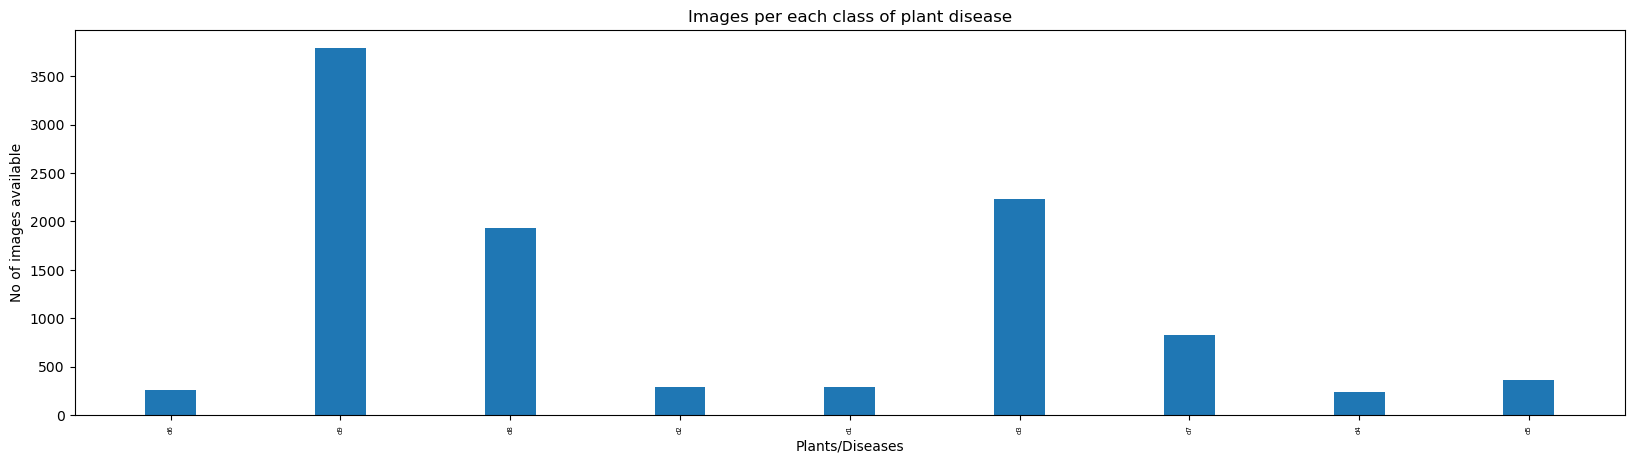

In [6]:
# plotting number of images available for each disease
index = [n for n in range(9)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, classes, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

We can see that the dataset is unbalanced for all classes

#### Images available for training

In [7]:
n_data = 0
for value in nums.values():
    n_data += value
print(f"There are {n_data} images for training")

There are 10211 images for training


# Data Preparation for training

In [ ]:
class ImageFolderSubset(torch.utils.data.Subset):
    '''A ImageFolder subset class'''
    def __init__(self, dataset):
        super().__init__(dataset, indices)
        self.targets = dataset.targets # 保留targets属性
        self.classes = dataset.classes # 保留classes属性
        self.indices = indices

    def __getitem__(self, idx): #同时支持索引访问操作
        x, y = self.dataset[self.indices[idx]]      
        return x, y 

    def __len__(self): # 同时支持取长度操作
        return len(self.indices)

In [ ]:
# datasets for validation and training
train_transform = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
dataset = ImageFolder(train_dir, transform=train_transform)

ratio = 0.8
n_train = int(n_data*0.8)
train, valid = torch.utils.data.random_split(dataset, [n_train, n_data-n_train])

train = ImageFolderSubset(dataset, train.indices)
valid = ImageFolderSubset(dataset, valid.indices)

In [10]:
len(train)

8168

In [11]:
len(valid)

2043

#### Image shape 

In [12]:
img, label = train[0]

print(img.shape, label)

torch.Size([3, 224, 224]) 7


In [13]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.dataset.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

## Some Images from training dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label :d8(7)


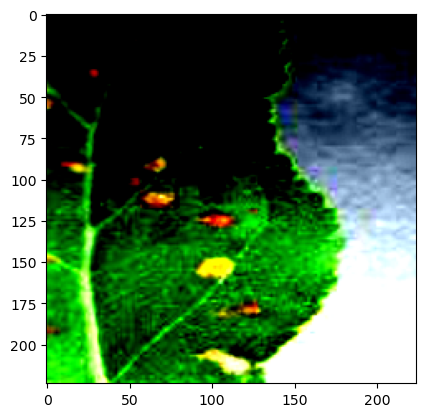

In [14]:
show_image(*train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label :d3(2)


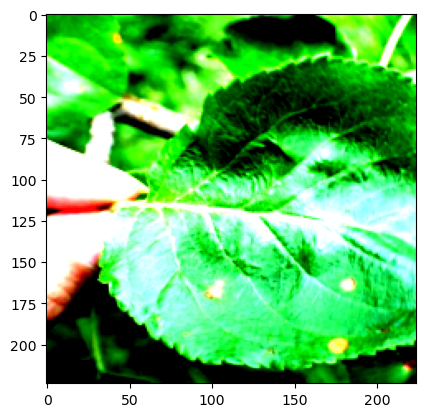

In [15]:
show_image(*valid[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label :d3(2)


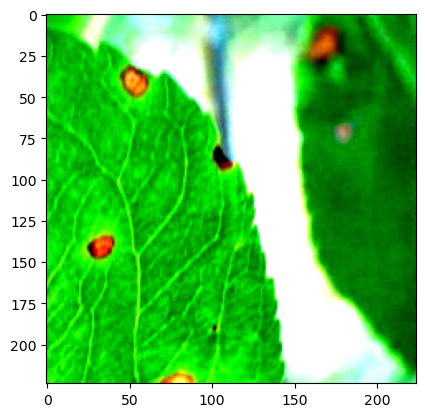

In [16]:
show_image(*train[8167])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label :d7(6)


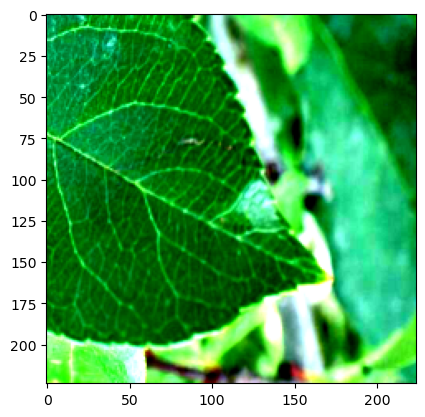

In [17]:
show_image(*train[4000])

In [18]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [19]:
# setting the batch size
batch_size = 128

In [20]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=8, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, shuffle=False, num_workers=8, pin_memory=True)

In [21]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


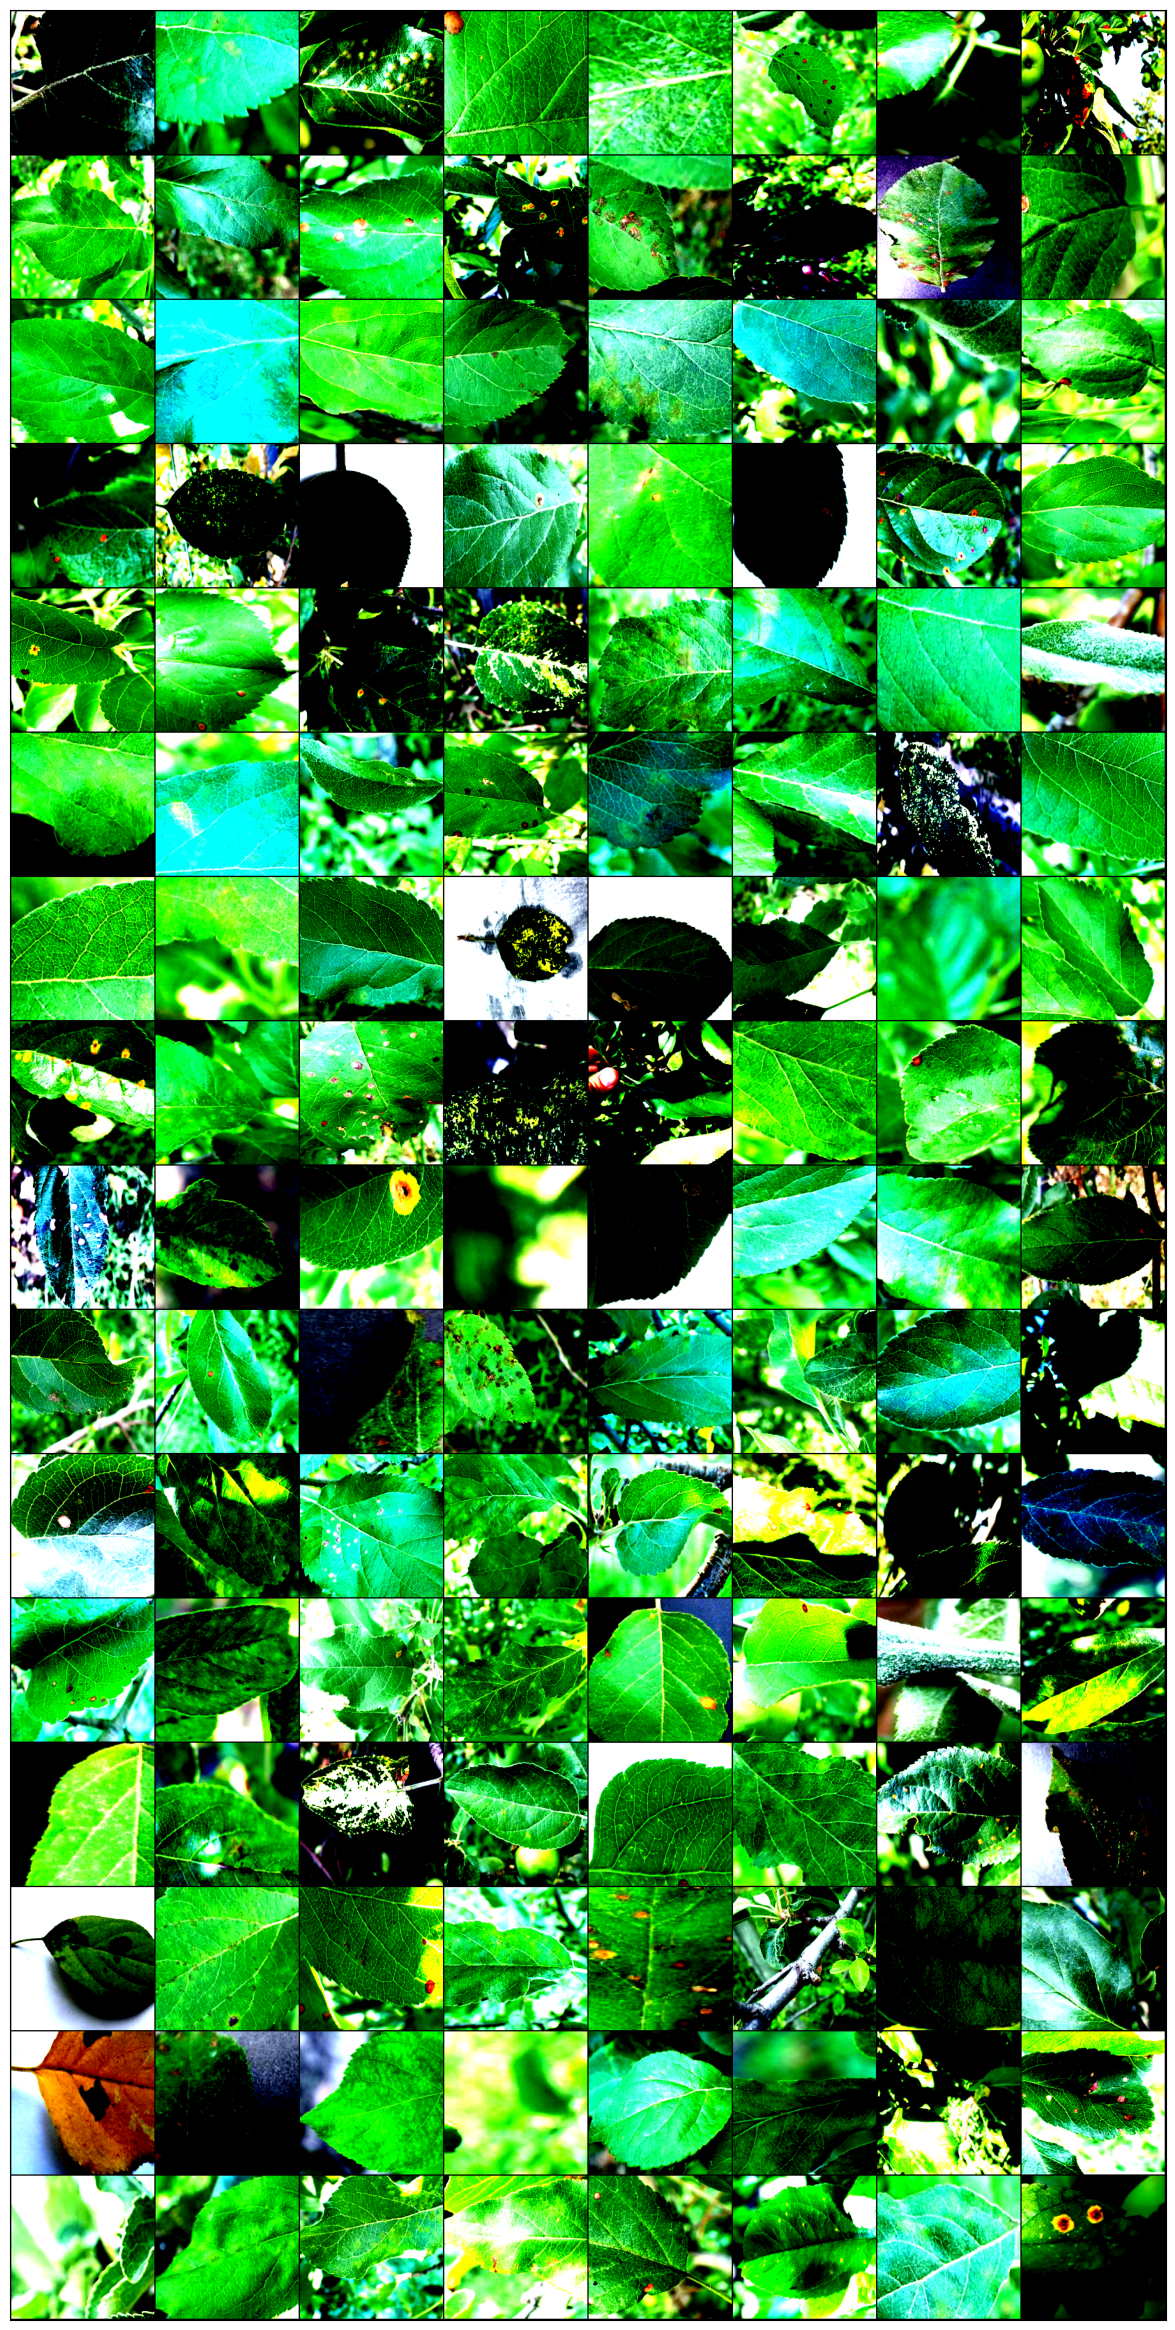

In [22]:
# Images for first batch of training
show_batch(train_dl) 

In [29]:
len(train.classes)

9